# Intro to Data Science @ SzISz Part IV.
## Dimensionality Reduction

### Table of contents
- <a href="#What-is-Dimensionality-Reduction?">Theory</a>
- <a href="#Feature-Selection">Feature Selection</a>
- <a href="#Matrix-Decomposition">Matrix Decomposition</a>
- <a href="#Other-Techniques">Other Techniques</a>

## What is Dimensionality Reduction?
Dimensionality reduction _"is the process of reducing the number of random variables under consideration, and can be divided into feature selection and feature extraction."_

_"__Feature selection__ approaches try to find a subset of the original variables. ... In some cases, data analysis such as regression or classification can be done in the reduced space more accurately than in the original space."_

_"__Feature extraction__ transforms the data in the high-dimensional space to a space of fewer dimensions. The data transformation may be linear, as in principal component analysis (PCA), but many nonlinear dimensionality reduction techniques also exist."_ from:<a href="https://en.wikipedia.org/wiki/Dimensionality_reduction">Wikipedia</a>


## Why is it important?
With hundreds of features in the datasets, there will always be some which does not contribute to the overall precision of the predictive model. These features could be redundant, overlapping or linear combination of each other or simply irrelevant to the prediction. To improve training and transformation/prediction time, it is crucial to reduce the number of features to a moderate amount.

The <a href="https://en.wikipedia.org/wiki/Curse_of_dimensionality">curse of dimensionality</a> also requires one to deal with the dimensionality concerns.


## Tools
- <a href="http://scikit-learn.org/stable/modules/feature_selection.html">Feature Selection</a>
- <a href="http://scikit-learn.org/stable/modules/decomposition.html#decompositions">Matrix decomposition</a>
- <a href="http://scikit-learn.org/stable/modules/feature_extraction.html#feature-hashing">Hashing</a>
- etc.

In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

## Feature Selection

In [3]:
from sklearn.svm import SVR, LinearSVC
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel

__VarianceThreshold__:

In [11]:
thres = VarianceThreshold(.4)
X_t = thres.fit_transform(X)
X_t.shape

(150, 3)

In [12]:
X_t[:10]

array([[ 5.1,  1.4,  0.2],
       [ 4.9,  1.4,  0.2],
       [ 4.7,  1.3,  0.2],
       [ 4.6,  1.5,  0.2],
       [ 5. ,  1.4,  0.2],
       [ 5.4,  1.7,  0.4],
       [ 4.6,  1.4,  0.3],
       [ 5. ,  1.5,  0.2],
       [ 4.4,  1.4,  0.2],
       [ 4.9,  1.5,  0.1]])

__RFE__:

In [13]:
svr = SVR(kernel="linear", C=.01)
rfe = RFE(svr, n_features_to_select=2)
X_t = rfe.fit_transform(X, y)
X_t.shape

(150, 2)

In [16]:
rfe.ranking_, rfe.support_

(array([3, 2, 1, 1]), array([False, False,  True,  True], dtype=bool))

In [14]:
X_t[:10]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1]])

__Select from model__:

In [19]:
svc = LinearSVC(C=.01).fit(X, y)
sel = SelectFromModel(svc, prefit=True)
X_t = sel.transform(X)
X_t.shape

(150, 2)

In [20]:
X_t[:10]

array([[ 3.5,  1.4],
       [ 3. ,  1.4],
       [ 3.2,  1.3],
       [ 3.1,  1.5],
       [ 3.6,  1.4],
       [ 3.9,  1.7],
       [ 3.4,  1.4],
       [ 3.4,  1.5],
       [ 2.9,  1.4],
       [ 3.1,  1.5]])

## Matrix Decomposition

In [3]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD

In [4]:
data2 = fetch_20newsgroups_vectorized(subset='test', remove=('headers', 'footers', 'quotes'))
X2, y2 = data2.data, data2.target

In [30]:
7532*101631*8/1024**2

5840

__PCA__:

In [ ]:
pca = PCA('mle')
X2_t = pca.fit_transform(X2.todense())
X2_t.shape

__SVD__:

In [32]:
svd = TruncatedSVD(n_components=300)
X2_t = svd.fit_transform(X2)
X2_t.shape

(7532, 300)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [38]:
baseline = mean_squared_error(y2, np.ones(y2.shape)*y2.mean())
baseline

30.946037356914271

In [41]:
knn = KNeighborsClassifier()
knn.fit(X2_t, y2)
mean_squared_error(y2, knn.predict(X2_t))

35.0787307488051

In [42]:
knn = KNeighborsClassifier()
knn.fit(X2, y2)
mean_squared_error(y2, knn.predict(X2))

37.098513011152413

## Other Techniques

In [28]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [29]:
data3 = fetch_20newsgroups()
X3, y3 = data3.data, data3.target

In [38]:
pipe = Pipeline([
    ('hash', HashingVectorizer(n_features=256)),
    ('tfidf', TfidfTransformer()),
    ('knn', KNeighborsClassifier())
])

In [39]:
pipe.fit(X3, y3)

Pipeline(steps=[('hash', HashingVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
         dtype=<type 'numpy.float64'>, encoding=u'utf-8', input=u'content',
         lowercase=True, n_features=256, ngram_range=(1, 1),
         non_negative=False, norm=u'l2', preprocessor=None,
         stop...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [40]:
pipe.score(X3, y3)

0.8034293795297861

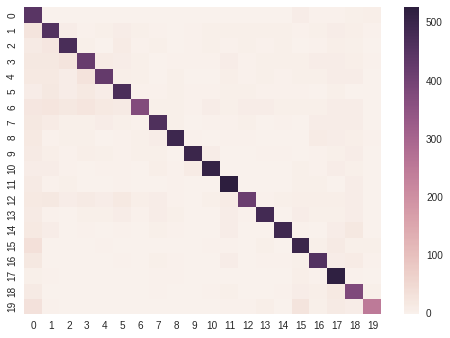

In [33]:
sns.heatmap(confusion_matrix(y3, pipe.predict(X3)))